# Chapter 7: Basic Statistics

## How do we measure statistics?

In [1]:
import numpy as np

### Measures of center

In [2]:
np.mean([11, 15, 17, 14])

14.25

In [3]:
np.mean([11, 15, 17, 14, 31])

17.6

In [11]:
np.median([11, 15, 17, 14])

14.5

In [10]:
np.median([11, 15, 17, 14, 31])

15.0

### Measures of variation

Consider that we take a random sample of 24 of our friends on Facebook and wrote
down how many friends that they had on Facebook. Here's the list:

In [3]:
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 125, 
           455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 
           531, 742, 621]

print (np.mean(friends))
print (np.median(friends))

789.0833333333334
769.5


The average of this list is just over 789. So, we could say that according to this
sample, the average Facebook friend has 789 friends. But what about the person
who only has 89 friends or the person who has over 1600 friends? In fact, not a lot of
these numbers are really that close to 789.

The median is 769.5, which is fairly close to the mean. Hmm, good thought, but still,
it doesn't really account for how drastically different a lot of these data points are to
one another. This is what statisticians call measuring the variation of data.

In essence, standard deviation,
denoted by s when we are working with a sample of a population, measures how
much data values deviate from the arithmetic mean.
It's basically a way to see how spread out the data is. There is a general formula to
calculate the standard deviation, which is as follows:

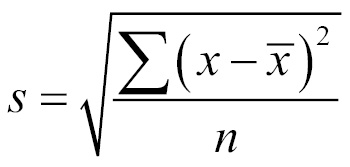

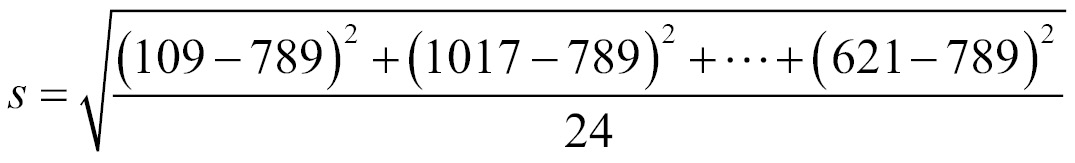

In [4]:
np.std(friends)

425.1862255399261

What the number 425 represents is the spread of data. You could say that 425 is a
kind of average distance the data values are from the mean. What this means, in
simple words, is that this data is pretty spread out.

<hr>

This means that the number of friends that these people have on Facebook doesn't seem to be close to a single number and
that's quite evident when we plot the data in a bar graph and also graph the mean
as well as the visualizations of the standard deviation. In the following plot, every
person will be represented by a single bar in the bar chart, and the height of the bars
represent the number of friends that the individuals have:

The blue line in the center is drawn at the mean (789), the red line on the bottom
is drawn at the mean minus the standard deviation (789-425 = 364), and, finally,
the green line towards the top is drawn at the mean plus the standard deviation
(789+425 = 1,214).

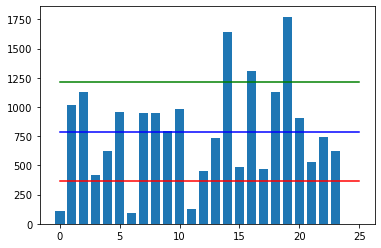

In [5]:
import matplotlib.pyplot as plt
y_pos = range(len(friends))

plt.bar(y_pos, friends)
plt.plot((0, 25), (789, 789), 'b-')
plt.plot((0, 25), (789+425, 789+425), 'g-')
plt.plot((0, 25), (789-425, 789-425), 'r-')

<i> Note how most of the data lives between the green and the red lines while the
outliers live outside the lines. Namely, there are three people who have friend counts
below the red line and three people who have a friend count above the green line.
It's important to mention that the units for standard deviation are, in fact, the
same units as the data's units. So, in this example, we would say that the standard
deviation is 425 friends on Facebook. </i>

### Measures of relative standing

Remember that the standard deviation was (sort of) an average distance that the data
is from the mean, and, now, the z-score is an individualized value for each particular
data point. We can find the z-score of a data value by subtracting it from the mean
and dividing it by the standard deviation. The output will be the standardized
distance a value is from a mean. We use the z-score all over statistics. It is a very
effective way of normalizing data that exists on very different scales, and also to put
data in context of their mean.

Let's take our previous data on the number of friends on Facebook and standardize
the data to the z-score. For each data point, we will find its z-score by applying the
preceding formula. We will take each individual, subtract the average friends from
the value, and divide that by the standard deviation, as shown:

In [54]:
z_scores = []
m = np.mean(friends)
s = np.std(friends)
for friend in friends:
    z = (friend - m)/s
    z_scores.append(z)

Now, let's plot these z-scores on a bar chart. The following chart shows the same
individuals from our previous example using friends on Facebook, but, instead of
the bar height revealing the raw number of friends, now each bar is the z-score of
the number of friends they have on Facebook. If we graph the z-scores, we'll notice
a few things:

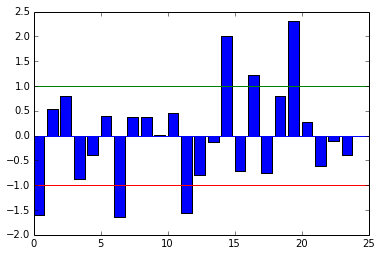

In [58]:
plt.bar(y_pos, z_scores)
plt.plot((0, 25), (1, 1), 'g-')
plt.plot((0, 25), (0, 0), 'b-')
plt.plot((0, 25), (-1, -1), 'r-')

• We have negative values (meaning that the data point is below the mean)
<br>
• The bars' lengths no longer represent the raw number of friends, but the
degree to which that friend count differs from the mean
<br>
This chart makes it very easy to pick out the individuals with much lower and higher
friends on an average. For example, the individual at index 0 has fewer friends on an
average (they had 109 friends where the average was 789).

The preceding code is adding in the following three lines:
<br>
• A blue line at y = 0 that represents zero standard deviations away from the
mean (which is on the x axis)
<br>
• A green line that represents one standard deviation above the mean
<br>
• A red line that represents one standard deviation below the mean

<hr>

#### Z-scores are an effective way to standardize/normalize data. This means that we can put the entire set on the same scale. 
For example, if we also measure each person's general
happiness scale (which is between 0 and 1), we might have a dataset similar to the
following dataset:

In [8]:
friends =   [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 
             125, 455, 731, 1640, 485, 1309, 472, 1132, 
                  1773, 906, 531, 742, 621]
happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8, 
             1, .6, .2, .7, .5, .3, .1, 0, .3, 1]

import pandas as pd

df = pd.DataFrame({'friends':friends, 'happiness':happiness})
df.head()

,friends,happiness
0,109,0.8
1,1017,0.6
2,1127,0.3
3,418,0.6
4,625,0.6


These data points are on two different dimensions, each with a very different scale.
The friend count can be in the thousands while our happiness score is stuck between
0 and 1.
To remedy this (and for some statistical/machine learning modeling, this concept
will become essential), we can simply standardize the dataset using a prebuilt
standardization package in scikit-learn, as follows:

In [10]:
from sklearn import preprocessing
df_scaled = pd.DataFrame(preprocessing.scale(df), columns = ['friends_scaled', 'happiness_scaled'])
df_scaled.head()

,friends_scaled,happiness_scaled
0,-1.599495,1.153223
1,0.536040,0.394939
2,0.794750,-0.742486
3,-0.872755,0.394939
4,-0.385909,0.394939


This code will scale both the friends and happiness columns simultaneously, thus
revealing the z-score for each column. It is important to note that by doing this,
the preprocessing module in sklearn is doing the following things separately for
each column:
<br>
• Finding the mean of the column
<br>
• Finding the standard deviation of the column
<br>
• Applying the z-score function to each element in the column

Now, we can plot friends and happiness on the same scale and the graph will at least
be readable.

<AxesSubplot:xlabel='friends_scaled', ylabel='happiness_scaled'>

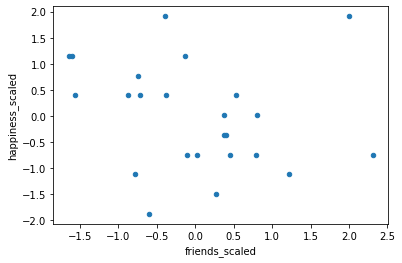

In [11]:
df_scaled.plot(kind='scatter', x = 'friends_scaled', y = 'happiness_scaled')

Now our data is standardized to the z-score and this scatter plot is fairly easily
interpretable! In later chapters, this idea of standardization will not only make our
data more interpretable, but it will also be essential in our model optimization. Many
machine learning algorithms will require us to have standardized columns as they
are reliant on the notion of scale.

<hr>

## The insightful part – correlations in data

In [72]:
np.corrcoef(friends, happiness)

array([[ 1.       , -0.2161988],
       [-0.2161988,  1.       ]])

In [73]:
z_scores_friends = []
m = np.mean(friends)
s = np.std(friends)
for friend in friends:
    z = (friend - m)/s
    z_scores_friends.append(z)
    
z_scores_happiness = []
m = np.mean(happiness)
s = np.std(happiness)
for happy in happiness:
    z = (happy - m)/s
    z_scores_happiness.append(z)

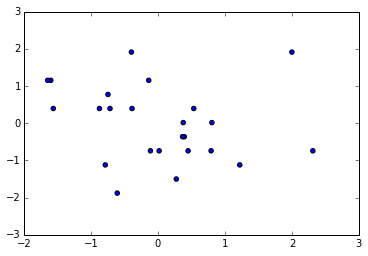

In [75]:
plt.scatter(z_scores_friends, z_scores_happiness)

In [74]:
np.corrcoef(z_scores_friends, z_scores_happiness)

array([[ 1.       , -0.2161988],
       [-0.2161988,  1.       ]])